# Sales Analysis on Company Data

#### Importing essential packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

#### Merging Excel files into one single file.

In [2]:
data_folder = './Sales_Data/'

df = []

for file in os.listdir(data_folder):
    df.append(pd.read_csv(os.path.join(data_folder, file)))

In [3]:
len(df)

12

In [4]:
all_data = pd.concat(df)
all_data.to_csv('all_data.csv', index=False)

> The files were merged successfully

### Cleaning Data

In [5]:
sales_df = pd.read_csv('./all_data.csv')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
sales_df.shape

(186850, 6)

In [8]:
sales_df.duplicated().sum()

1162

In [9]:
sales_df.drop_duplicates(ignore_index=True, inplace=True)

In [10]:
sales_df.duplicated().sum()

0

In [11]:
sales_df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [12]:
sales_df.dropna(inplace=True)

In [13]:
sales_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Adding Month Column

> Upon running this code 'sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])', an error was raised which means that there is an invalid entry in the 'Order Date' column, I went ahead and searched for the wrong entry

In [15]:
sales_df['Order Date'][254]

'Order Date'

> it seems that the invalid entry is on row 254

In [16]:
sales_df.loc[sales_df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


> to fix that we will drop the entire row

In [17]:
sales_df.drop([254], axis=0, inplace=True)

In [18]:
sales_df.loc[sales_df['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


> now that we have fixed the issue, changing the 'Order Date' column to datetime should not raise any errors

#### Here, we will change the 'Order Date' to datetime

In [19]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

In [20]:
sales_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

> after checking the datatypes of columns, we can see that we successfully changed the 'Order Date' column to datetime, now we can extract the month number from the 'Order Date' column and later change it to month name

In [21]:
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"


> Now we will use the 'dt.month_name()' to extract the month name from the 'Order Date' column

In [22]:
sales_df['Month'] = sales_df['Order Date'].dt.month_name()

In [23]:
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December


In [24]:
sales_df['Month'].value_counts()

December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: Month, dtype: int64

## Analysis

### Adding a Sales column

> We can add the 'Sales' column by multiplying the 'Quantity Ordered' and 'Price Each' columns.

In [25]:
sales_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

> By looking at the datatypes, we can see that 'Quantity Ordered' and 'Price Each' columns are of the datatype 'object', so we cannot do arithmetic operations with those values. Thus, we need to transform the datatypes into numerical values.

In [26]:
sales_df['Quantity Ordered'] = sales_df['Quantity Ordered'].astype(int)

In [27]:
sales_df['Price Each'] = sales_df['Price Each'].astype(float)

In [28]:
sales_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
dtype: object

> After fixing the datatypes of the columns, we can now do arithmetic operations to be able to create the 'Sales' column

##### Now we add the 'Sales' column.

In [29]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']

In [30]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95


### Question 1: What was the best month in sales? How much was earned that month?

> to answer those questions we will need to get the total sales for each month.

In [31]:
sales_df.groupby(sales_df['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
April,20536,3366218.76,3389217.98
August,13429,2226963.90,2241083.37
December,28074,4583267.77,4608295.70
February,13431,2186940.38,2200078.08
January,10893,1810924.81,1821413.16
July,16054,2631225.12,2646461.32
June,15234,2560503.50,2576280.15
March,16979,2789084.64,2804973.35
May,18653,3133134.61,3150616.23


In [32]:
sales_results = sales_df['Sales'].groupby(sales_df['Month']).sum()
sales_results

Month
April        3389217.98
August       2241083.37
December     4608295.70
February     2200078.08
January      1821413.16
July         2646461.32
June         2576280.15
March        2804973.35
May          3150616.23
November     3197875.05
October      3734777.86
September    2094465.69
Name: Sales, dtype: float64

In [33]:
months = [month for month, df in sales_df.groupby('Month')]

In [34]:
sales_results.max()

4608295.7

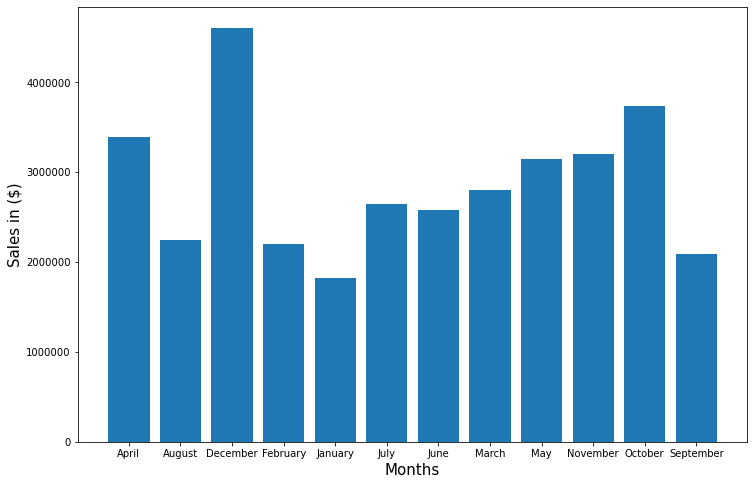

In [35]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.bar(months, sales_results)
plt.xticks(months, fontsize=10)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sales in ($)', fontsize=15)
plt.show()

> According to the visualization above, we can conclude that December had the highest sales, and total sales for that month were $4,608,296

### Question 2: Which city had the highest number of sales

> To determine which city had the highest number of sales we would first add a new column; 'City', and then group total sales by cities to figure out which city had the highest sales

In [36]:
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [37]:
sales_df.tail(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
185686,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,11.95,San Francisco
185687,222909,AAA Batteries (4-pack),1,2.99,2019-06-25 14:33:00,"209 11th St, Atlanta, GA 30301",June,2.99,Atlanta


In [38]:
city_results = sales_df['Sales'].groupby(sales_df['City']).sum()

In [39]:
cities = [x for x, df in sales_df.groupby(sales_df['City'])]

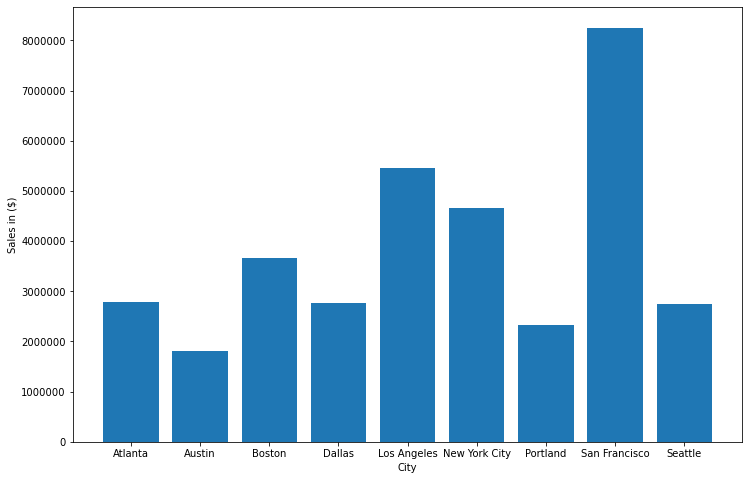

In [40]:
plt.subplots(figsize=(12, 8))
plt.ticklabel_format(style='plain')
plt.bar(cities, city_results)
plt.xticks(cities)
plt.yticks(np.arange(0, 9000000, 1000000))
plt.xlabel('City')
plt.ylabel('Sales in ($)')
plt.show()

> According to the bar chart above. It seems that the city with the highest sales is San Francisco

### Question 3: What time should we display advertisements to maximize the likelihood of a customer buying our product?

> to answer this question, we will start by extracting the time from the 'Order Date' column, then plot the hours on a chart to see which time is more frequent. This would indicate the best time to display advertisements.

In [41]:
sales_df['Time'] = sales_df['Order Date'].dt.strftime('%H').add(':00')
sales_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.0,New York City,00:00
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.0,New York City,07:00


In [42]:
hours = [hour for hour, df in sales_df.groupby(sales_df['Time'])]
hour_frequency = sales_df['Sales'].groupby(sales_df['Time']).count()

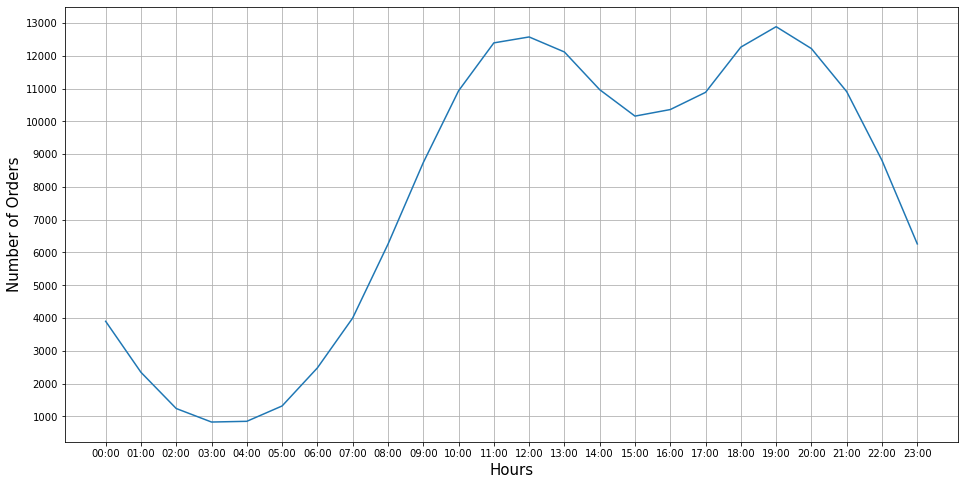

In [43]:
plt.subplots(figsize=(16,8))
plt.yticks(np.arange(0, 14000, 1000))
plt.xticks()
plt.plot(hours, hour_frequency)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.grid()
plt.show()

> Based on the graph above, we can see that the most frequent times when customers placed orders were from 11:00 to 13:00 and fom 18:30 to 19:30. So displaying advertisements before or around those times would maximize the likelihood of a customer buying our products.

> to answer that question, we will filter out the duplicated Order IDs, and plot the products associated with those Order Ids, in order to figure out which products are sold together more often.

### Question 4: Which product(s) sold the most? and what is your interpretation to that?

> to answer this question, we will need to count the orders of every product. And then plot them on a bar chart to be able to visualize which product(s) sold the most.

In [44]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,1700.00,New York City,00:00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,600.00,New York City,07:00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,11.95,New York City,18:00
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,149.99,San Francisco,15:00
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,11.95,Atlanta,12:00


In [45]:
ordercounts = sales_df['Quantity Ordered'].groupby(sales_df['Product']).sum()
ordercounts

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int64

In [46]:
products = [product for product, df in sales_df.groupby(sales_df['Product'])]
products

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

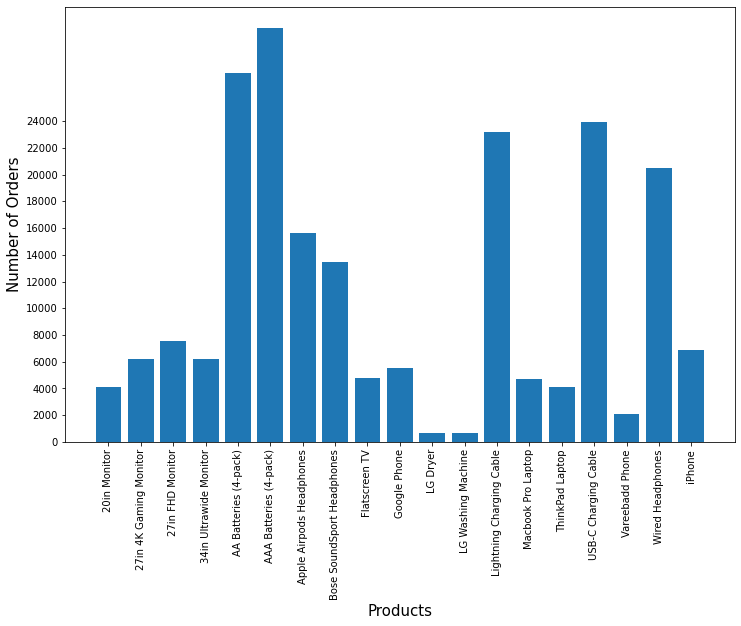

In [47]:
plt.subplots(figsize=(12, 8))
plt.bar(products, ordercounts)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 25000, 2000))
plt.xlabel('Products', fontsize=15)
plt.ylabel('Number of Orders', fontsize=15)
plt.show()

> We will try and investigate to see if the price of the product has any correlation to the amount of product sales.

In [48]:
prices = sales_df['Price Each'].groupby(sales_df['Product']).unique().astype(float)
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

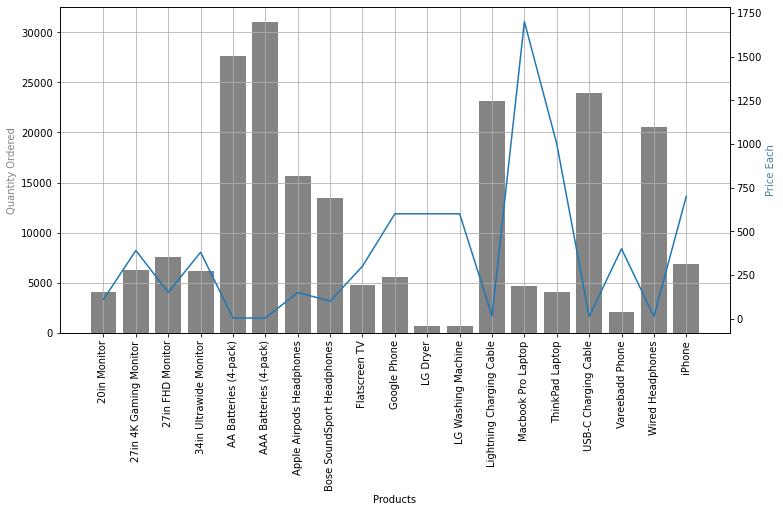

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 6))

plt.xticks(rotation=90)
plt.grid()

ax2 = ax1.twinx()

ax1.bar(products, ordercounts, color=(0.2, 0.2, 0.2, 0.6))
ax2.plot(products, prices)

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color=(0.2, 0.2, 0.2, 0.6))
ax2.set_ylabel('Price Each', color=(0.3, 0.5, 0.6, 1))

plt.show()

> Upon investigating this graph, we can observe that the price a product has different effects on the demand of the product. We can see that the most selling products are the AA & AAA Batteries (4-pack), since they are the lowest in price, but are in high demand, which justifies why they are the most selling items.


> On the other hand, we can see that the Macbook Pro & ThinkPad Laptops are the highest priced products, but the demand for them are higher in contrast to the LG Washing Machine and Dryer sales. This could indicate that because washing machines and dryer are usually bought once every number of years, but the demand for laptops is higher because technology is constantly evolving.


> Thus, we can conclude that the chance of a product being chosen and bought by a customer is usually driven by the demand for that product, with regards to its price relative to other products.

### Exporting the updated dataframe to .csv

In [50]:
sales_df.to_csv('./all_data_updated.csv', index=False)